In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt

import gym
import gym_maze

In [2]:
def get_action(env, Q, state, explore_rate):
    
    rand_action = env.action_space.sample()
    
    max_action = np.argmax(Q[state])
    
#     if set(Q[state])==set([0.0]):        
#         max_action = env.action_space.sample()
    
    return int(np.random.choice([rand_action, max_action], 1, p=[explore_rate, 1 - explore_rate]))

In [3]:
def run_maze(env, explore_rate, learning_rate, discount):
    Q = np.zeros((size, size, 4))
    moves = []
    
    reward_dump = []
    
    trial = 0
    
    
    while (len(set(reward_dump[abs(len(reward_dump)-4):len(reward_dump)])) != 1 or len(moves)<2):

        trial = trial +1
        
        print("\nTrial:", trial)

        env.reset()

        state = (0, 0)

        move = 0
        
        total_reward = 0
        
        calc_v = [1, 5]
        
        total_v = []

        while True:

            env.render()

            action = get_action(env, Q, state, explore_rate)

            observation, reward, done, info = env.step(action)

            new_state = (observation[0], observation[1])

            q_dash = max(Q[new_state])
            
#             if move in calc_v:
                
#                 inside_done = copy.deepcopy(done)
#                 inside_new_state = copy.deepcopy(new_state)
                
#                 inside_v = 0
                
#                 inside_move = 1
                
#                 v_reward = []
            
#                 while not inside_done:
#                     inside_action = get_action(env, Q, inside_new_state, explore_rate)

#                     inside_observation, inside_reward, inside_done, _ = env.step(inside_action)

#                     inside_new_state = (inside_observation[0], inside_observation[1])
                    
#                     inside_v += (discount**inside_move) * inside_reward
                    
#                     inside_move += 1
                    
#                 print(inside_v)
                
#                 env.step(action)
            
            total_reward += reward
        
            total_v.append(reward)

            if SARSA:
                new_action = get_action(env, Q, new_state, explore_rate)

                q_dash = Q[new_state][new_action]


            Q[state][action] += learning_rate * (reward + (discount * q_dash) - Q[state][action])

            state = new_state
            if done:
                print("Reached Goal in", move, "moves")
                reward_dump.append(total_reward)
                moves.append(move)
                
                for c in range(0, len(total_v)-1):
                    if c%3==0:
                        v = 0
                        c_c = 1
                        for v_v in range(c, len(total_v)-1):
                            v += total_v[v_v] * (discount**c_c)
                            c_c += 1
                        print("State ",c,":",v)
                break

            move += 1
            
    print("Converged in", len(reward_dump), "iterations")
    dump.append((moves, "Size: " + str(size) + " | Explore Rate: " + str(explore_rate) + " | Learning Rate: " + str(
        learning_rate) + " | Discount: " + str(discount), "SARSA: "+str(SARSA),"Iterations: "+str(len(reward_dump))))
    return Q

In [4]:
def test_model(env, Q):
    env.reset()

    state = (0, 0)

    move = 0

    while True:

        env.render()

        action = int(np.argmax(Q[state]))

        observation, reward, done, info = env.step(action)

        new_state = (observation[0], observation[1])

#         if True:
#             _ = int(np.argmax(Q[new_state]))

#             env.step(_)

#             env.step(action)

        state = new_state

        if done:
            print("Reached Goal in", move, "moves")
            break

        move += 1

In [5]:
def print_plots(dump):
    for moves, title, SARSA, iterations in dump:
        print(SARSA)
        print(iterations)
        plt.plot(moves)
        plt.ylabel('Moves')
        plt.xlabel('Trial')
        plt.title(title)
        plt.show()

In [6]:
size = 5

env = gym.make("maze-random-" + str(size) + "x" + str(size) + "-v0")

dump = []

pygame 1.9.5.dev0
Hello from the pygame community. https://www.pygame.org/contribute.html
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [7]:
SARSA = False
Q = run_maze(env, 0.05, 0.3, 0.8)


Trial: 1
Reached Goal in 136 moves
State  0 : -0.015999999999998935
State  3 : -0.01599999999999793
State  6 : -0.01599999999999596
State  9 : -0.015999999999992114
State  12 : -0.015999999999984603
State  15 : -0.015999999999969934
State  18 : -0.01599999999994128
State  21 : -0.015999999999885318
State  24 : -0.01599999999977602
State  27 : -0.015999999999562545
State  30 : -0.015999999999145597
State  33 : -0.015999999998331252
State  36 : -0.015999999996740736
State  39 : -0.015999999993634256
State  42 : -0.01599999998756691
State  45 : -0.015999999975716633
State  48 : -0.015999999952571554
State  51 : -0.015999999907366322
State  54 : -0.015999999819074857
State  57 : -0.015999999646630583
State  60 : -0.01599999930982536
State  63 : -0.015999998652002658
State  66 : -0.0159999973671927
State  69 : -0.01599999485779825
State  72 : -0.015999989956637213
State  75 : -0.015999980384057068
State  78 : -0.015999961687611468
State  81 : -0.015999925171116158
State  84 : -0.0159998538

Reached Goal in 35 moves
State  0 : -0.015993509628926827
State  3 : -0.015987323493997715
State  6 : -0.01597524119921429
State  9 : -0.015951642967215414
State  12 : -0.015905552670342608
State  15 : -0.015815532559262907
State  18 : -0.015639712029810366
State  21 : -0.015296312558223365
State  24 : -0.014625610465280004
State  27 : -0.013315645440000004
State  30 : -0.010757120000000002
State  33 : -0.005760000000000001

Trial: 11
Reached Goal in 11 moves
State  0 : -0.014625610465280004
State  3 : -0.013315645440000004
State  6 : -0.010757120000000002
State  9 : -0.005760000000000001

Trial: 12
Reached Goal in 12 moves
State  0 : -0.014900488372224005
State  3 : -0.013852516352000004
State  6 : -0.011805696000000003
State  9 : -0.007808000000000002

Trial: 13
Reached Goal in 7 moves
State  0 : -0.012644556800000003
State  3 : -0.009446400000000002
State  6 : -0.0032

Trial: 14
Reached Goal in 21 moves
State  0 : -0.015852426047410325
State  3 : -0.015711769623848293
State  6 : -0.

In [8]:
SARSA = True
Q = run_maze(env, 0.05, 0.3, 0.8)


Trial: 1
Reached Goal in 136 moves
State  0 : -0.015999999999998935
State  3 : -0.01599999999999793
State  6 : -0.01599999999999596
State  9 : -0.015999999999992114
State  12 : -0.015999999999984603
State  15 : -0.015999999999969934
State  18 : -0.01599999999994128
State  21 : -0.015999999999885318
State  24 : -0.01599999999977602
State  27 : -0.015999999999562545
State  30 : -0.015999999999145597
State  33 : -0.015999999998331252
State  36 : -0.015999999996740736
State  39 : -0.015999999993634256
State  42 : -0.01599999998756691
State  45 : -0.015999999975716633
State  48 : -0.015999999952571554
State  51 : -0.015999999907366322
State  54 : -0.015999999819074857
State  57 : -0.015999999646630583
State  60 : -0.01599999930982536
State  63 : -0.015999998652002658
State  66 : -0.0159999973671927
State  69 : -0.01599999485779825
State  72 : -0.015999989956637213
State  75 : -0.015999980384057068
State  78 : -0.015999961687611468
State  81 : -0.015999925171116158
State  84 : -0.0159998538

Reached Goal in 12 moves
State  0 : -0.014900488372224005
State  3 : -0.013852516352000004
State  6 : -0.011805696000000003
State  9 : -0.007808000000000002

Trial: 10
Reached Goal in 40 moves
State  0 : -0.01599787323520674
State  3 : -0.015995846162513167
State  6 : -0.015991887036158534
State  9 : -0.015984154367497144
State  12 : -0.015969051499017863
State  15 : -0.01593955370901927
State  18 : -0.01588194083792826
State  21 : -0.015769415699078634
State  24 : -0.015549640037262955
State  27 : -0.015120390697779205
State  30 : -0.014282013081600004
State  33 : -0.012644556800000003
State  36 : -0.009446400000000002
State  39 : -0.0032

Trial: 11
Reached Goal in 14 moves
State  0 : -0.015296312558223365
State  3 : -0.014625610465280004
State  6 : -0.013315645440000004
State  9 : -0.010757120000000002
State  12 : -0.005760000000000001

Trial: 12
Reached Goal in 7 moves
State  0 : -0.012644556800000003
State  3 : -0.009446400000000002
State  6 : -0.0032

Trial: 13
Reached Goal in 7 m

In [9]:
# dump

SARSA: False
Iterations: 19


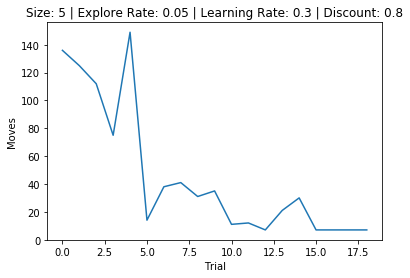

SARSA: True
Iterations: 21


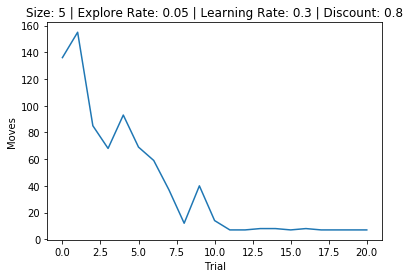

In [10]:
print_plots(dump)

In [11]:
Q

array([[[-1.14524711e-02, -1.15976749e-02,  1.43773180e-02,
         -1.21238690e-02],
        [-1.17069628e-02, -1.15895362e-02, -1.16522974e-02,
         -1.17183773e-02],
        [-8.55352884e-03, -8.39249833e-03, -7.99927715e-03,
         -8.54010396e-03],
        [-7.76228827e-03, -8.22596448e-03, -7.80862123e-03,
         -7.80862123e-03],
        [-7.73251057e-03, -7.03044812e-03, -7.22751594e-03,
         -7.03044812e-03]],

       [[-9.91395746e-03, -9.95326463e-03,  5.87262593e-02,
         -1.02300389e-02],
        [-9.73585093e-03, -9.10925865e-03, -9.22769772e-03,
         -9.22769772e-03],
        [-8.59091422e-03, -8.54010396e-03, -8.54010396e-03,
         -8.62386136e-03],
        [-9.05214186e-03, -8.54010396e-03, -8.56773448e-03,
         -8.54010396e-03],
        [-6.20260438e-03, -6.41396874e-03, -6.62273904e-03,
         -6.27771808e-03]],

       [[-8.54238213e-03, -8.54674863e-03,  1.45964867e-01,
         -8.75168601e-03],
        [-8.88166411e-03, -8.60513091e-

In [12]:
test_model(env, Q)

Reached Goal in 7 moves
